Programming Exercises

Question 1

Question 1a

In [ ]:
import keras
keras.__version__

'2.14.0'

In [ ]:
from keras.datasets import mnist
(train_X,train_Y),(test_X,test_Y) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


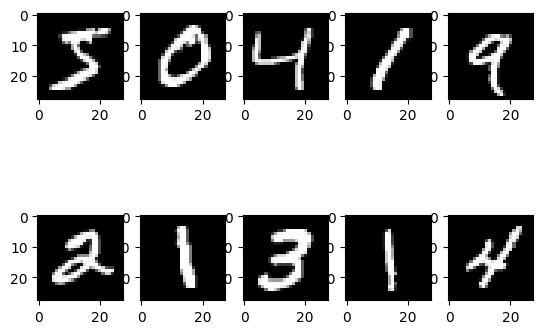

In [ ]:
from matplotlib import pylab as plt
import matplotlib.cm as cm

plt.figure()
for i in range(0, 10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_X[i, :, :], cmap = cm.Greys_r)
plt.show()

Question 1b

In [ ]:
# reshape train and test input matrices
train_X_r = train_X.reshape(-1, 28, 28, 1)
test_X_r = test_X.reshape(-1, 28, 28, 1)

In [ ]:
print(train_X_r.shape)
print(test_X_r.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
# scaling pixel values
train_X_rn = train_X_r.astype('float32') / 255.0
test_X_rn = test_X_r.astype('float32') / 255.0

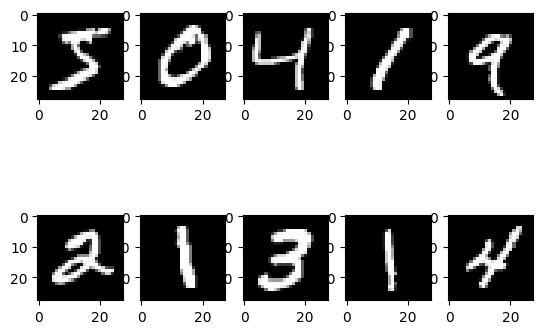

In [ ]:
plt.figure()
for i in range(0, 10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_X_rn[i, :, :], cmap = cm.Greys_r)
plt.show()

In [ ]:
from keras.utils import to_categorical

# converting training and test output labels
# to categorical one hot encoded form

train_Y_oh = to_categorical(train_Y)
test_Y_oh = to_categorical(test_Y)
print(train_Y_oh.shape)
print(test_Y_oh.shape)

(60000, 10)
(10000, 10)


In [ ]:
for i in range(10):
  print(train_Y_oh[i,:])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


Question 1c

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.optimizers import SGD
from keras.initializers import he_uniform
from keras.utils import to_categorical
from keras.layers import Dropout

In [ ]:
# define the basic cnn given in the instructions

def create_cnn():
    # define using Sequential
    model = Sequential()
    # Convolution layer
    model.add(
        Conv2D(32, (3, 3),
               activation='relu',
               kernel_initializer=he_uniform(),
               input_shape=(28, 28, 1))
    )
    # Maxpooling layer
    model.add(MaxPooling2D((2, 2)))
    # Flatten output
    model.add(Flatten())
    # Dense layer of 100 neurons
    model.add(
        Dense(100,
              activation='relu',
              kernel_initializer=he_uniform())
    )
    model.add(Dense(10, activation='softmax'))
    # initialize optimizer
    opt = SGD(learning_rate=0.01, momentum=0.9)
    # compile model
    model.compile(
        optimizer=opt,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Example usage:
# model = create_cnn()
# model.summary()  # View model summary

In [ ]:
cnn_model = create_cnn()
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542230 (2.07 MB)
Trainable params: 542230 (2.07 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

Question 1d

In [ ]:
# train the basic model
cnn_model.fit(train_X_rn, train_Y_oh, batch_size = 32, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 33s 19ms/step - loss: 0.1822 - accuracy: 0.9446 - val_loss: 0.0782 - val_accuracy: 0.9782
Epoch 2/10
1688/1688 [==============================] - 31s 18ms/step - loss: 0.0623 - accuracy: 0.9813 - val_loss: 0.0523 - val_accuracy: 0.9862
Epoch 3/10
1688/1688 [==============================] - 30s 18ms/step - loss: 0.0399 - accuracy: 0.9879 - val_loss: 0.0590 - val_accuracy: 0.9835
Epoch 4/10
1688/1688 [==============================] - 32s 19ms/step - loss: 0.0280 - accuracy: 0.9915 - val_loss: 0.0453 - val_accuracy: 0.9888
Epoch 5/10
1688/1688 [==============================] - 32s 19ms/step - loss: 0.0189 - accuracy: 0.9943 - val_loss: 0.0512 - val_accuracy: 0.9868
Epoch 6/10
1688/1688 [==============================] - 33s 20ms/step - loss: 0.0130 - accuracy: 0.9964 - val_loss: 0.0531 - val_accuracy: 0.9853
Epoch 7/10
1688/1688 [==============================] - 31s 18ms/step - loss: 0.0100 - accuracy: 0.9971 - val_loss: 0.0442 -

In [ ]:
# evaluate the basic model on the test set
score_basic = cnn_model.evaluate(test_X_rn, test_Y_oh, verbose = 0)

In [ ]:
# print accuracy
print(score_basic)

[0.041981346905231476, 0.9884999990463257]


1d. The given simple CNN model accuracy evaluated on test set after 10 epochs of training, is found to be 98.85 %

Question 1e

Question 1 e i.

In [98]:
cnn_model_50_2 = create_cnn()
cnn_model_50_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 5408)              0         
                                                                 
 dense_16 (Dense)            (None, 100)               540900    
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 542230 (2.07 MB)
Trainable params: 542230 (2.07 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [99]:
# train basic model for 50 epochs
epoch_history_50_2 = cnn_model_50_2.fit(train_X_rn, train_Y_oh, batch_size=32, epochs=50, validation_split=0.1)
train_acc_50_2 = epoch_history_50_2.history['accuracy']
val_acc_50_2 = epoch_history_50_2.history['val_accuracy']

Epoch 1/50
1688/1688 [==============================] - 32s 19ms/step - loss: 0.1778 - accuracy: 0.9456 - val_loss: 0.0739 - val_accuracy: 0.9790
Epoch 2/50
1688/1688 [==============================] - 43s 26ms/step - loss: 0.0591 - accuracy: 0.9823 - val_loss: 0.0533 - val_accuracy: 0.9845
Epoch 3/50
1688/1688 [==============================] - 40s 24ms/step - loss: 0.0382 - accuracy: 0.9881 - val_loss: 0.0457 - val_accuracy: 0.9882
Epoch 4/50
1688/1688 [==============================] - 42s 25ms/step - loss: 0.0267 - accuracy: 0.9918 - val_loss: 0.0525 - val_accuracy: 0.9845
Epoch 5/50
1688/1688 [==============================] - 46s 27ms/step - loss: 0.0180 - accuracy: 0.9949 - val_loss: 0.0517 - val_accuracy: 0.9868
Epoch 6/50
1688/1688 [==============================] - 43s 25ms/step - loss: 0.0124 - accuracy: 0.9966 - val_loss: 0.0508 - val_accuracy: 0.9882
Epoch 7/50
1688/1688 [==============================] - 45s 27ms/step - loss: 0.0089 - accuracy: 0.9979 - val_loss: 0.0609 -

The graph for 50 epochs of training on the simple CNN model is as below.

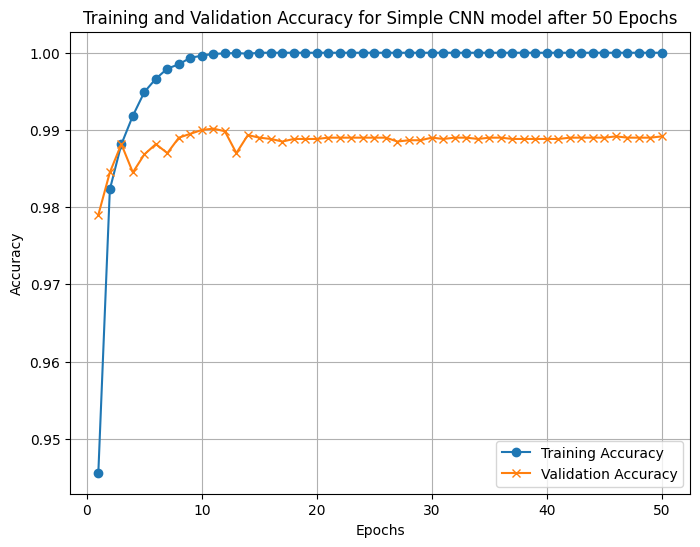

In [100]:
epochs = range(1, 51)  # Total epochs: 50
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_acc_50_2, label='Training Accuracy', marker='o')
plt.plot(epochs, val_acc_50_2, label='Validation Accuracy', marker='x')

plt.title('Training and Validation Accuracy for Simple CNN model after 50 Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(range(0, 51, 10))  # Show ticks for every 10 epochs
plt.legend()
plt.grid(True)
plt.show()

In [101]:
score_basic_50_2 = cnn_model_50_2.evaluate(test_X_rn, test_Y_oh, verbose = 0)

In [102]:
print(score_basic_50_2)

[0.051399242132902145, 0.9879000186920166]


The given simple CNN model accuracy evaluated on test set after 50 epochs of training, is found to be 98.79 %

Question 1 e ii.

In [ ]:
# add dropout to basic cnn

def create_cnn_d():
    model = Sequential()
    model.add(
        Conv2D(32, (3, 3),
               activation='relu',
               kernel_initializer=he_uniform(),
               input_shape=(28, 28, 1))
    )
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())

    # Adding dropout
    model.add(Dropout(0.5))

    model.add(
        Dense(100,
              activation='relu',
              kernel_initializer=he_uniform())
    )
    model.add(Dense(10, activation='softmax'))
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(
        optimizer=opt,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [ ]:
cnn_model_d = create_cnn_d()
cnn_model_d.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dropout (Dropout)           (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               540900    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                      

In [ ]:
# train basic cnn with dropout, for 50 epochs
epoch_history_d = cnn_model_d.fit(train_X_rn, train_Y_oh, batch_size=32, epochs=50, validation_split=0.1)
train_acc_d = epoch_history_d.history['accuracy']
val_acc_d = epoch_history_d.history['val_accuracy']

Epoch 1/50
1688/1688 [==============================] - 37s 21ms/step - loss: 0.2313 - accuracy: 0.9277 - val_loss: 0.0735 - val_accuracy: 0.9780
Epoch 2/50
1688/1688 [==============================] - 35s 21ms/step - loss: 0.0928 - accuracy: 0.9724 - val_loss: 0.0509 - val_accuracy: 0.9870
Epoch 3/50
1688/1688 [==============================] - 35s 21ms/step - loss: 0.0698 - accuracy: 0.9780 - val_loss: 0.0454 - val_accuracy: 0.9868
Epoch 4/50
1688/1688 [==============================] - 38s 23ms/step - loss: 0.0560 - accuracy: 0.9822 - val_loss: 0.0401 - val_accuracy: 0.9880
Epoch 5/50
1688/1688 [==============================] - 35s 21ms/step - loss: 0.0470 - accuracy: 0.9848 - val_loss: 0.0422 - val_accuracy: 0.9880
Epoch 6/50
1688/1688 [==============================] - 34s 20ms/step - loss: 0.0400 - accuracy: 0.9872 - val_loss: 0.0375 - val_accuracy: 0.9893
Epoch 7/50
1688/1688 [==============================] - 34s 20ms/step - loss: 0.0367 - accuracy: 0.9882 - val_loss: 0.0397 -

The graph for 50 epochs of training on the simple CNN model with dropout added, is as below.

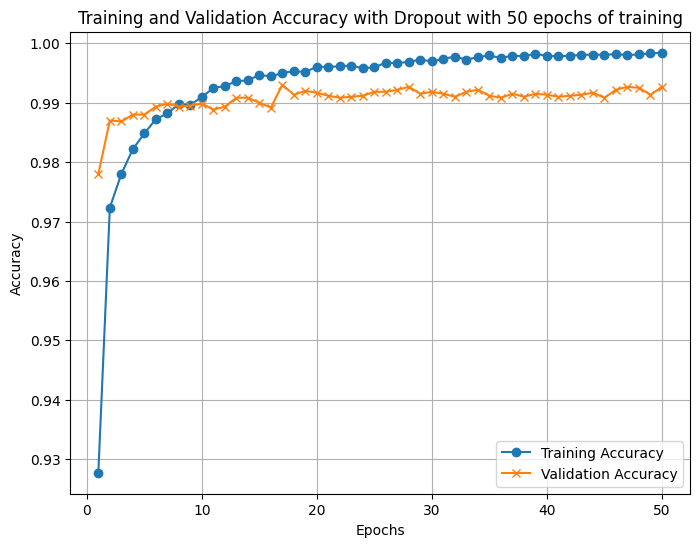

In [103]:
epochs = range(1, 51)
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_acc_d, label='Training Accuracy', marker='o')
plt.plot(epochs, val_acc_d, label='Validation Accuracy', marker='x')

plt.title('Training and Validation Accuracy with Dropout with 50 epochs of training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(range(0, 51, 10))  # Show ticks for every 10 epochs
plt.legend()
plt.grid(True)
plt.show()

In [84]:
score_d_50 = cnn_model_d.evaluate(test_X_rn, test_Y_oh, verbose = 0)

In [85]:
print(score_d_50)

[0.03427775576710701, 0.9912999868392944]


The accuracy given simple CNN model with dropout added, as evaluated on test set after 50 epochs of training, is found to be 99.12 %

Question 1e iii.

In [ ]:
# add second convolution and maxpooling to basic cnn

def create_cnn_cm():
    model = Sequential()
    model.add(
        Conv2D(32, (3, 3),
               activation='relu',
               kernel_initializer=he_uniform(),
               input_shape=(28, 28, 1))
    )
    model.add(MaxPooling2D((2, 2)))
    # Added Convolution layer with 64 filters
    model.add(
        Conv2D(64, (3, 3),
               activation='relu',
               kernel_initializer=he_uniform(),
               input_shape=(28, 28, 1))
    )
    # Added Maxpooling layer
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(
        Dense(100,
              activation='relu',
              kernel_initializer=he_uniform())
    )
    model.add(Dense(10, activation='softmax'))
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(
        optimizer=opt,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [ ]:
cnn_model_cm = create_cnn_cm()
cnn_model_cm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 100)              

In [ ]:
cnn_model_cm.fit(train_X_rn, train_Y_oh, batch_size = 32, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 74s 44ms/step - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.0478 - val_accuracy: 0.9898
Epoch 2/10
1688/1688 [==============================] - 49s 29ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.0511 - val_accuracy: 0.9907
Epoch 3/10
1688/1688 [==============================] - 51s 30ms/step - loss: 8.4090e-04 - accuracy: 0.9999 - val_loss: 0.0478 - val_accuracy: 0.9910
Epoch 4/10
1688/1688 [==============================] - 50s 30ms/step - loss: 3.9990e-04 - accuracy: 1.0000 - val_loss: 0.0457 - val_accuracy: 0.9917
Epoch 5/10
1688/1688 [==============================] - 52s 31ms/step - loss: 3.3690e-04 - accuracy: 0.9999 - val_loss: 0.0456 - val_accuracy: 0.9917
Epoch 6/10
1688/1688 [==============================] - 47s 28ms/step - loss: 2.6126e-04 - accuracy: 1.0000 - val_loss: 0.0518 - val_accuracy: 0.9907
Epoch 7/10
1688/1688 [==============================] - 49s 29ms/step - loss: 4.3333e-04 - accuracy: 0.9999 

In [51]:
score_cm = cnn_model_cm.evaluate(test_X_rn, test_Y_oh, verbose = 0)

In [52]:
print(score_cm)

[0.03376149386167526, 0.9925000071525574]


The accuracy of the CNN model with one additional convolution and maxpooling layer each added, as evaluated on test set after 10 epochs of training, is found to be 99.25 %

Question 1 e iv.

Small learning rate

In [53]:
# add both second conv + maxpool and dropout to basic cnn, small lr

def create_cnn_cmd_slr():
    model = Sequential()
    model.add(
        Conv2D(32, (3, 3),
               activation='relu',
               kernel_initializer=he_uniform(),
               input_shape=(28, 28, 1))
    )
    model.add(MaxPooling2D((2, 2)))

    # Added Convolution layer
    model.add(
        Conv2D(64, (3, 3),
               activation='relu',
               kernel_initializer=he_uniform(),
               input_shape=(28, 28, 1))
    )
    # Added Maxpooling layer
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    # Added dropout
    model.add(Dropout(0.5))

    model.add(
        Dense(100,
              activation='relu',
              kernel_initializer=he_uniform())
    )
    model.add(Dense(10, activation='softmax'))

    # small learning rate
    opt = SGD(learning_rate=0.001, momentum=0.9)

    model.compile(
        optimizer=opt,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [54]:
cnn_cmd_slr = create_cnn_cmd_slr()
cnn_cmd_slr.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1600)             

In [55]:
cnn_cmd_slr.fit(train_X_rn, train_Y_oh, batch_size = 32, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 62s 36ms/step - loss: 0.4103 - accuracy: 0.8709 - val_loss: 0.0977 - val_accuracy: 0.9735
Epoch 2/10
1688/1688 [==============================] - 57s 34ms/step - loss: 0.1586 - accuracy: 0.9515 - val_loss: 0.0746 - val_accuracy: 0.9798
Epoch 3/10
1688/1688 [==============================] - 55s 33ms/step - loss: 0.1246 - accuracy: 0.9614 - val_loss: 0.0654 - val_accuracy: 0.9823
Epoch 4/10
1688/1688 [==============================] - 52s 31ms/step - loss: 0.1048 - accuracy: 0.9670 - val_loss: 0.0529 - val_accuracy: 0.9858
Epoch 5/10
1688/1688 [==============================] - 51s 30ms/step - loss: 0.0943 - accuracy: 0.9711 - val_loss: 0.0513 - val_accuracy: 0.9863
Epoch 6/10
1688/1688 [==============================] - 55s 33ms/step - loss: 0.0857 - accuracy: 0.9735 - val_loss: 0.0451 - val_accuracy: 0.9870
Epoch 7/10
1688/1688 [==============================] - 51s 30ms/step - loss: 0.0765 - accuracy: 0.9766 - val_loss: 0.0412 -

In [56]:
score_cmd_slr = cnn_cmd_slr.evaluate(test_X_rn, test_Y_oh, verbose = 0)

In [57]:
print(score_cmd_slr)

[0.037879835814237595, 0.9873999953269958]


The accuracy of the CNN model with one additional convolution and maxpooling layer, and dropout added, as evaluated on test set after 10 epochs of training, using a learning rate of 0.001, is found to be 98.74 %

Question 1 e iv.

Large learning rate

1e iv.

extra conv and maxpool + dropout part 1 learning rate 0.1 train 10 epochs and report accuracy for test set

In [58]:
# add both second conv + maxpool and dropout to basic cnn, large lr

def create_cnn_cmd_llr():
    model = Sequential()
    model.add(
        Conv2D(32, (3, 3),
               activation='relu',
               kernel_initializer=he_uniform(),
               input_shape=(28, 28, 1))
    )
    model.add(MaxPooling2D((2, 2)))

    # Added Convolution layer
    model.add(
        Conv2D(64, (3, 3),
               activation='relu',
               kernel_initializer=he_uniform(),
               input_shape=(28, 28, 1))
    )
    # Added Maxpooling layer
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())

    # Added dropout
    model.add(Dropout(0.5))

    model.add(
        Dense(100,
              activation='relu',
              kernel_initializer=he_uniform())
    )
    model.add(Dense(10, activation='softmax'))

    # large learning rate
    opt = SGD(learning_rate=0.1, momentum=0.9)

    model.compile(
        optimizer=opt,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [87]:
cnn_cmd_llr2 = create_cnn_cmd_llr()
cnn_cmd_llr2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_7 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_4 (Dropout)         (None, 1600)             

In [88]:
cnn_cmd_llr2.fit(train_X_rn, train_Y_oh, batch_size = 32, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 52s 30ms/step - loss: 0.9541 - accuracy: 0.7386 - val_loss: 1.2307 - val_accuracy: 0.5727
Epoch 2/10
1688/1688 [==============================] - 49s 29ms/step - loss: 1.3959 - accuracy: 0.5863 - val_loss: 1.0850 - val_accuracy: 0.6558
Epoch 3/10
1688/1688 [==============================] - 50s 29ms/step - loss: 1.6602 - accuracy: 0.4717 - val_loss: 1.5194 - val_accuracy: 0.4652
Epoch 4/10
1688/1688 [==============================] - 48s 28ms/step - loss: 1.8179 - accuracy: 0.4049 - val_loss: 1.4717 - val_accuracy: 0.4345
Epoch 5/10
1688/1688 [==============================] - 50s 29ms/step - loss: 1.7028 - accuracy: 0.4485 - val_loss: 1.9250 - val_accuracy: 0.2677
Epoch 6/10
1688/1688 [==============================] - 55s 32ms/step - loss: 2.1436 - accuracy: 0.2169 - val_loss: 2.3089 - val_accuracy: 0.1050
Epoch 7/10
1688/1688 [==============================] - 52s 31ms/step - loss: 2.3087 - accuracy: 0.1053 - val_loss: 2.3067 -

In [89]:
score_cmd_llr2 = cnn_cmd_llr2.evaluate(test_X_rn, test_Y_oh, verbose = 0)

In [90]:
print(score_cmd_llr2)

[2.3115124702453613, 0.0957999974489212]


The accuracy of the CNN model with one additional convolution and maxpooling layer, and dropout added, as evaluated on test set after 10 epochs of training, using a learning rate of 0.1, is found to be 9.58 %


Question 1f


Question 1f i.


Without a dropout layer, the model training accuracy increased quickly and without downwards fluctuation, reaching 100% in a little over 10 epochs, and then remained there till the 50th epoch (completion of the training).
The validation accuracy increased over the first 15 epochs or so but it had noticeable downward fluctuations (in the graph, though the magnitude is about 0.5% but it is noticeable in the graph line), and the validation accuracy also basically plateaus after the 15th epoch onwards.
This model most likely may have a slight overfitting.


On the other hand, with a dropout layer, the training accuracy increases without any drops as well, but it increases at a slower rate than the model without dropout, it increases a bit with every epoch and does not plateau within the 50 epochs unlike the case without dropout, and the final taining accuracy with dropout did not reach 100%.
With dropout, the validation accuracy also increased steadily and gradually, with much smaller downward fluctuations compared to the model with no dropout, and the final validation accuracy with dropout was about 99.2% which is slightly higher than that of the model with no dropout (98.9%).


Question 1 f ii.

In these experiments, the test accuracy of the CNN with a single convolution layer with 10 epochs of training was 98.85%, while that of the CNN with two convolution layers was 99.25%.

The addition of another convolution layer improved the performance of the model by a very small margin.

Including an additional convolution layer helps to improve the accuracy by allowing the network to learn increasingly complex and abstract features, improving its ability to discriminate between classes. Deeper layers extract hierarchical information, aiding generalization and reducing overfitting, ultimately boosting accuracy.

Question 1 f iii

When using the small learning rate of 0.001, the test accuracy was 98.74%, while with the larger learning rate, the test accuracy was only 9.5%.

For the smaller learning rate, a steady trend of gradual increases in training and validation accuracies were observed with each subsequent training epoch.

For the larger learning rate, the initial validation accuracy was slightly over 50% after the first training epoch, and improved a bit for the second epoch, then started getting worse sharply, and within 5 epochs it was at a very low performance of around 10% which is no better than random guessing in this case, and the performance remaiened at that level for the subsequent epochs.

Question 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cp /content/drive/MyDrive/ECE5414_AML_FA23/mona_lisa_aml_hw4.jpg /content/sample_data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Question 2a

/content/sample_data
anscombe.json*               california_housing_train.csv  mnist_train_small.csv  monalisa_gray.jpg
california_housing_test.csv  mnist_test.csv                mona_lisa_aml_hw4.jpg  README.md*


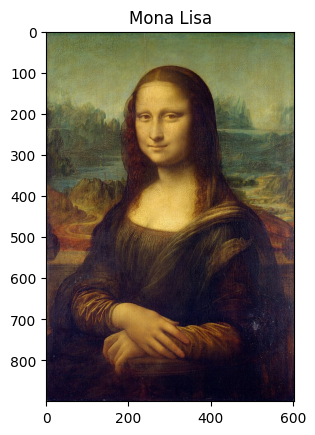

In [ ]:
%cd /content/sample_data
%pwd
%ls

img = plt.imread('mona_lisa_aml_hw4.jpg')
plt.imshow(img);
plt.title("Mona Lisa");

Question 2b and 2c

Question 2b and 2c Preprocessing steps Writeup:

For random forests, it is not necessary to perform mean subtraction, standardization, or unit-normalization. This is because decision dress are scale invariant (make splits based on individual feature thresholds, and splitting rules are based on order and not magnitude).
For this implementation, the image has been converted to grayscale and the random forest model outputs are also grayscale.


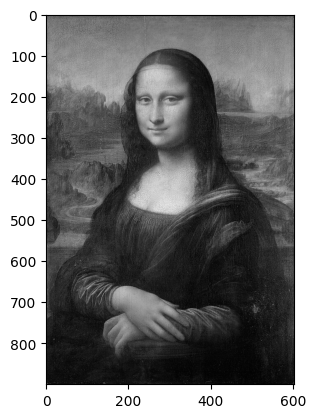

In [ ]:
from PIL import Image

img = Image.open('mona_lisa_aml_hw4.jpg')
img_gray = img.convert('L')
plt.imshow(img_gray,cmap='gray');

In [ ]:
print(type(img_gray))

<class 'PIL.Image.Image'>


In [ ]:
img_gray_array = np.array(img_gray)

In [ ]:
img_gray_array.shape

(900, 604)

Question 2b

In [ ]:
hg, wg = img_gray_array.shape[0], img_gray_array.shape[1]
y_5000g = np.random.choice(hg, size=5000, replace=True)
x_5000g = np.random.choice(wg, size=5000, replace=True)

In [ ]:
coords_g=[]
for i,j in zip(y_5000g,x_5000g):
  coords_g.append((i,j))

In [ ]:
print(coords_g)

[(642, 14), (228, 163), (539, 444), (359, 233), (122, 469), (114, 341), (778, 66), (6, 546), (631, 146), (332, 378), (666, 288), (315, 250), (190, 7), (622, 84), (146, 335), (562, 544), (263, 494), (600, 150), (257, 278), (625, 60), (446, 213), (839, 348), (733, 419), (339, 507), (210, 230), (157, 156), (322, 385), (244, 164), (852, 189), (190, 545), (887, 208), (444, 359), (866, 507), (55, 188), (809, 191), (113, 363), (854, 465), (761, 530), (211, 49), (260, 333), (792, 255), (772, 485), (610, 422), (216, 560), (670, 337), (500, 217), (293, 589), (168, 29), (878, 377), (698, 111), (155, 423), (244, 374), (465, 112), (165, 371), (463, 498), (222, 493), (818, 62), (104, 585), (834, 159), (106, 327), (237, 365), (860, 372), (876, 453), (135, 268), (271, 436), (845, 39), (632, 326), (622, 295), (610, 130), (368, 504), (2, 547), (10, 445), (812, 290), (105, 67), (432, 497), (81, 422), (319, 275), (598, 232), (566, 13), (115, 526), (895, 88), (484, 365), (478, 228), (312, 583), (416, 58), 

[55, 105, 62, 46, 147, 22, 32, 107, 45, 45, 20, 49, 97, 39, 52, 72, 98, 58, 92, 40, 141, 9, 60, 81, 85, 172, 36, 92, 27, 171, 38, 114, 4, 115, 35, 14, 11, 3, 111, 74, 38, 6, 15, 139, 49, 54, 95, 146, 16, 56, 158, 26, 143, 17, 34, 127, 25, 137, 25, 42, 12, 10, 10, 176, 39, 57, 2, 20, 37, 59, 78, 85, 29, 119, 59, 127, 82, 51, 92, 141, 21, 61, 134, 83, 74, 41, 138, 42, 130, 35, 28, 116, 121, 134, 16, 8, 80, 149, 6, 66, 128, 38, 28, 44, 145, 118, 55, 85, 134, 12, 142, 18, 23, 60, 157, 118, 41, 65, 123, 39, 132, 10, 152, 168, 9, 134, 89, 21, 56, 160, 83, 90, 19, 56, 36, 24, 114, 67, 137, 59, 64, 13, 23, 32, 31, 19, 61, 32, 22, 129, 67, 62, 38, 139, 31, 6, 23, 62, 26, 142, 36, 25, 21, 33, 129, 156, 30, 108, 160, 17, 104, 42, 21, 90, 126, 117, 150, 46, 68, 114, 85, 52, 38, 58, 64, 57, 29, 130, 34, 9, 14, 31, 71, 145, 118, 40, 96, 47, 151, 186, 154, 20, 132, 123, 59, 51, 89, 22, 97, 2, 135, 167, 87, 22, 117, 129, 15, 55, 111, 78, 31, 10, 25, 164, 115, 146, 13, 68, 103, 156, 133, 132, 71, 123, 

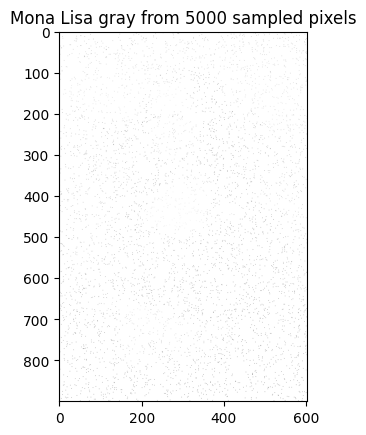

In [ ]:
pixels_g = []
img_5000_g = np.zeros([hg, wg, 3]) + 255
for coord in coords_g:
  pixels_g.append(img_gray_array[coord])
  img_5000_g[coord] = img_gray_array[coord]

print(pixels_g)
plt.imshow(img_5000_g / 255);
plt.title("Mona Lisa gray from 5000 sampled pixels");

Question 2d

In [ ]:
all_coords_g = []
for i in range(hg):
  for j in range(wg):
    all_coords_g.append((i,j))

#print(all_coords_g)

In [ ]:
def randfor_reg (coords,pixels,all_coord,depth = None, num_trees = 1):
  rf = RandomForestRegressor(max_depth = depth, n_estimators = num_trees)
  rf.fit(coords,pixels)
  pred = rf.predict(all_coord)
  return pred

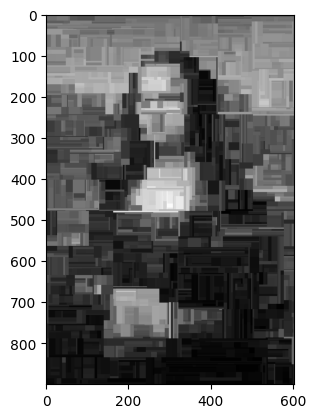

In [105]:
p = randfor_reg(coords_g,pixels_g,all_coords_g)
plt.imshow(np.array(p).reshape(hg,wg), cmap="gray")
plt.show()

The above is the prediction result of random forest with a single tree, and max_depth not limited by us (left to the algorithm to grow the tree until it fits well).

Question 2e i.

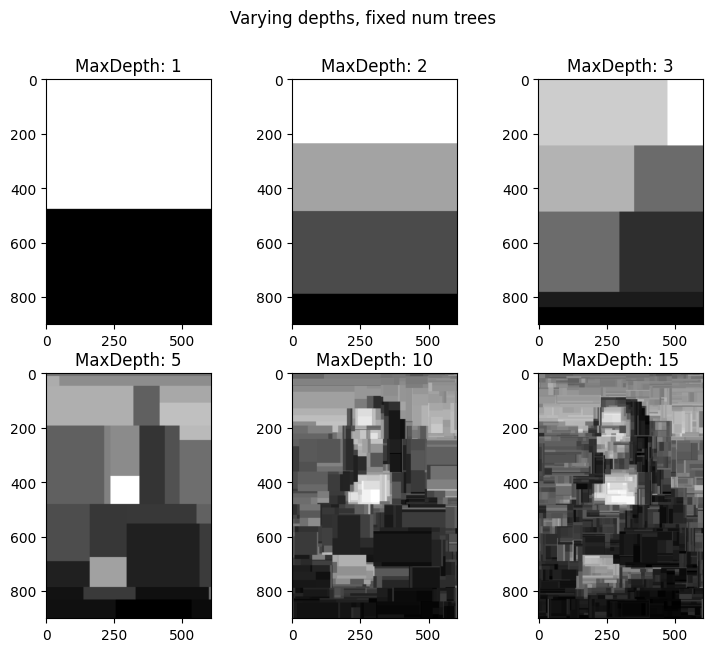

In [92]:
depths = [1,2,3,5,10,15]
fig, axs = plt.subplots(2,3, figsize=(9, 7))

for i in range(0, len(depths)):
    plt.subplot(2, 3, i+1)
    title = f'MaxDepth: {depths[i]}'
    plt.subplot(2, 3, i+1).set_title(title)
    p = randfor_reg(coords_g,pixels_g,all_coords_g, depth = depths[i])
    plt.imshow(np.array(p).reshape(hg,wg), cmap="gray")
plt.suptitle('Varying depths, fixed num trees')
plt.show()

2 e i.

It is observed that as the maximum depth of the tree is increased, the number of patches of different colors which appear on the prediction result increase.

This is directly by definition of how the tree works.

Tree with max depth of 1 can have 2 leaves, max depth 2 has 4 leaves, max depth 3 has 8 leaves, max depth of 5 has 32 leaves; in general, max depth of n has 2^n leaves (which can represent different pixel intensities / shades of gray / different colors).

Thus exponentially more shades can appear in the predicted result as max depth increases; and as a result, the image appears more intricate with more details (more shades and finer resolution or granularity of boxes) and looks closer to the original the larger the maximum depth is allowed to be.

Question 2 e ii.

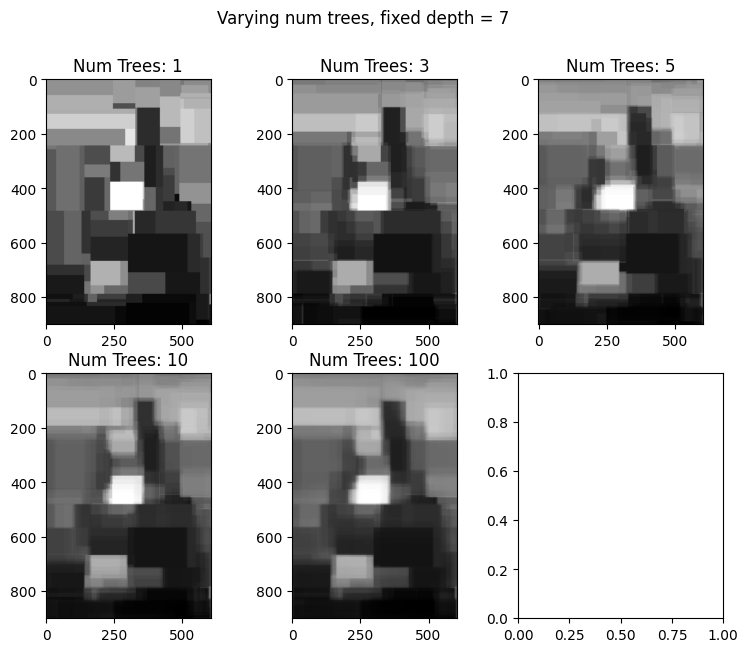

In [94]:
#variable number of trees
numtrees = [1,3,5,10,100]
fig, axs = plt.subplots(2,3, figsize=(9, 7))

for i in range(0, len(numtrees)):
    plt.subplot(2, 3, i+1)
    title = f'Num Trees: {numtrees[i]}'
    plt.subplot(2, 3, i+1).set_title(title)
    p = randfor_reg(coords_g,pixels_g,all_coords_g, depth = 7, num_trees = numtrees[i])
    plt.imshow(np.array(p).reshape(hg,wg), cmap="gray")
plt.suptitle('Varying num trees, fixed depth = 7')
plt.show()

2 e ii.

With a fixed maximum depth and increasing number of trees, it is observed that the predicted image becomes progressively smoother, there are fewer sharp edges; instead, the edges between 2 different colors appear to be slightly more blurry and less sharply defined (more smooth). The overall image looks closer to the original as well with increasing number of trees.

The random forest is an ensemble learner using decision trees. Each tree functions as an independent classifier, trained without reliance on other trees. Every tree picks a random subset of features or data and categorizes them through various nodes, ultimately providing predictions via their leaf nodes. To generate a combined ensemble final prediction, a majority vote is taken from all the decision trees.

Each tree alone does not classify the points well, but averaging them out creates a more reliable predictor with less sharp fluctuations resulting in a smoother image.

Question 2 e iii.

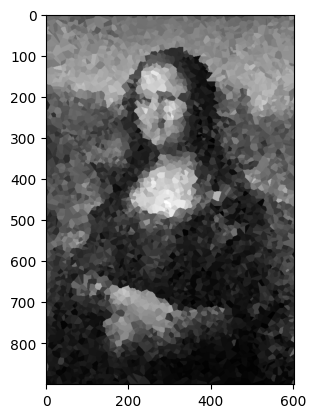

In [ ]:
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(coords_g, pixels_g)
pred_g_knn = knn.predict(all_coords_g)
plt.imshow(np.array(pred_g_knn).reshape(hg,wg), cmap="gray")
plt.show()

2 e iii.

When comparing the images predicted by Random Forest and kNN, there's a notable difference in their patterns. In kNN, the image displays smaller circular shapes or "blobs" due to its classification method—each pixel's class relies on the majority of its k nearest neighbors, resulting in circular patterns. On the other hand, Random Forest employs decision trees that divide data based on specific features, visually creating rectangular partitions. Pixels are sorted into these rectangles by the decision trees, leading to more box-like decision boundaries seen as rectangles in the image.

Question 2 e iv.

In [64]:
def randfor_reg_pruning (coords,pixels,all_coord,depth = None, num_trees = 1, minsamplessplit = 2, minsamplesleaf = 1):
  rf = RandomForestRegressor(max_depth = depth, n_estimators = num_trees, min_samples_split = minsamplessplit, min_samples_leaf = minsamplesleaf)
  rf.fit(coords,pixels)
  pred = rf.predict(all_coord)
  return pred

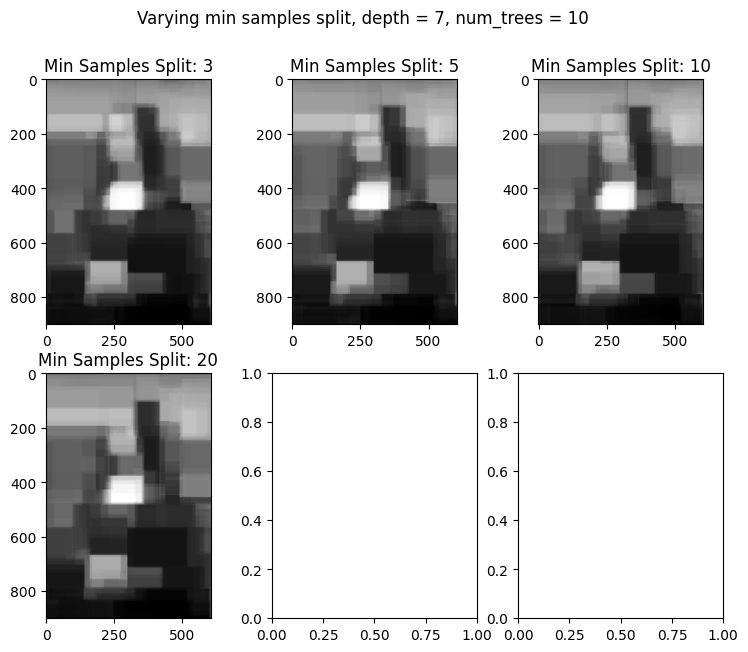

In [96]:
#variable number of min_samples_split
minsampsplits = [3,5,10,20]
fig, axs = plt.subplots(2,3, figsize=(9, 7))

for i in range(0, len(minsampsplits)):
    plt.subplot(2, 3, i+1)
    title = f'Min Samples Split: {minsampsplits[i]}'
    plt.subplot(2, 3, i+1).set_title(title)
    p = randfor_reg_pruning(coords_g,pixels_g,all_coords_g, depth = 7, num_trees = 10, minsamplessplit = minsampsplits[i])
    plt.imshow(np.array(p).reshape(hg,wg), cmap="gray")
plt.suptitle('Varying min samples split, depth = 7, num_trees = 10')
plt.show()

Pruning is usually used for overfitting, but for the models trained so far most do not seem to be significantly overfit.

From the above images, it can be observed that as the min samples to split increases, the finer details in the image actually are lost (e.g. the hair on the left side of her face becomes less clear)

Also, the image becomes smoother with higher values of min samples split.

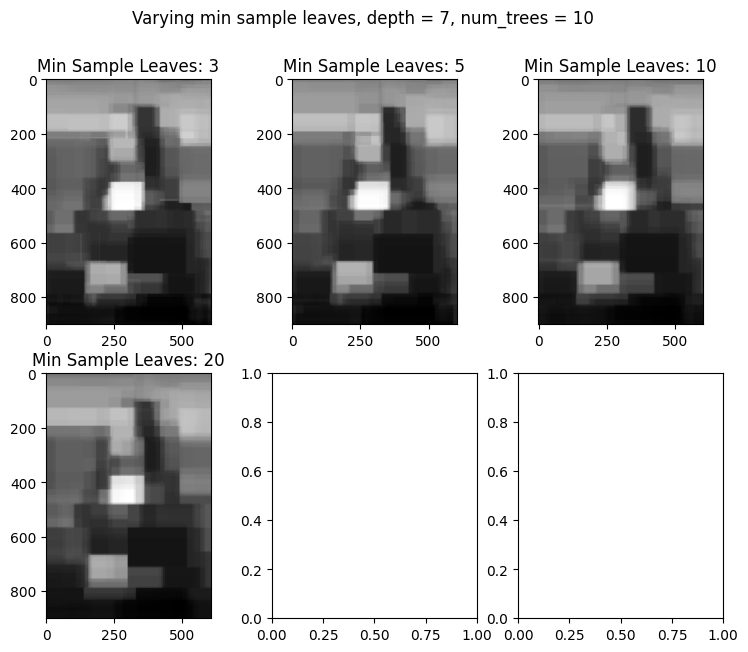

In [108]:
#variable number of min_samples_leaves
minsampleaves = [3,5,10,20]
fig, axs = plt.subplots(2,3, figsize=(9, 7))

for i in range(0, len(minsampleaves)):
    plt.subplot(2, 3, i+1)
    title = f'Min Sample Leaves: {minsampleaves[i]}'
    plt.subplot(2, 3, i+1).set_title(title)
    p = randfor_reg_pruning(coords_g,pixels_g,all_coords_g, depth = 7, num_trees = 10, minsamplessplit = 5, minsamplesleaf = minsampleaves[i])
    plt.imshow(np.array(p).reshape(hg,wg), cmap="gray")
plt.suptitle('Varying min sample leaves, depth = 7, num_trees = 10')
plt.show()

From the above images, it can be observed that as the min samples per leaf increases, the image becomes smoother and less detailed, similar to increasing the min samples split.

In the images above, increasing min samples split results in small boxes of color but with less sharp changes between adjacent boxes

Question 2 f

Question 2 f i.

A node classifies pixels based on their coordinates (x, y). At the root node, the decision boundary at approximately y = 500 divided the image. Pixels with y-coordinate greater than 500 were classified as black(left node), while those with y < 500 were labeled white (right node).

The rule can be represented as
return leftNode if y-value > 510 else return rightNode


Question 2 f ii

When comparing the images predicted by Random Forest and kNN, there's a notable difference in their patterns. In kNN, the image displays smaller circular shapes or "blobs" due to its classification method—each pixel's class relies on the majority of its k nearest neighbors, resulting in circular patterns. On the other hand, Random Forest employs decision trees that divide data based on specific features, visually creating rectangular partitions. Pixels are sorted into these rectangles by the decision trees, leading to more box-like decision boundaries evident as rectangles in the image.

Written Exercises

Question 1

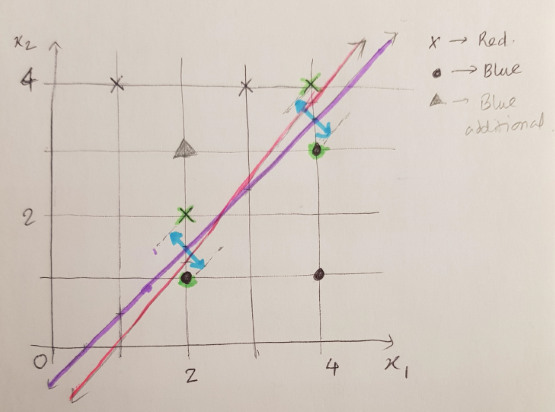

a.	The purple line is the maximum margin separating hyperplane

b.	The equation of the purple line is
x1 - x2 – 0.5 = 0

c.	The margin are the 2 blue lines perpendicular to the purple one in the graph

d.	The support vectors are (2,2),(4,4) and (2,1), (4,3), marked in green.

e.	The position of the maximal margin classifier is determined only by the support vectors, and the seventh observation is not a support vector. Unless the seventh observation moved closer to the max margin separating hyperplane than the current support vectors (and this becoming a support vector itself), it would not affect the maximal margin hyperplane.

f.	The pink line in graph is a separating hyperplane which is not the maximum margin separating hyperplane.
Its equation is 1.25 x1 – x2 – 1.25 = 0

g.	Incuding (2,3) (represented by the triangle) as part of the blue class would make the data no longer separable by a hyperplane.


Question 2 (Written)

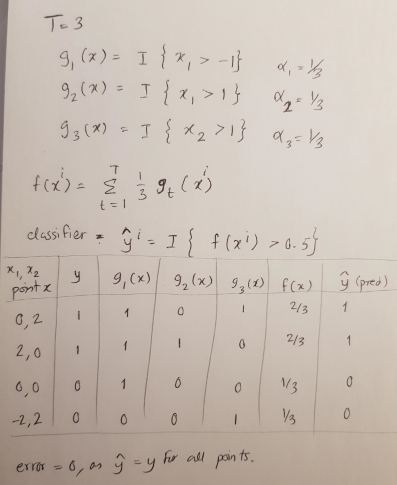

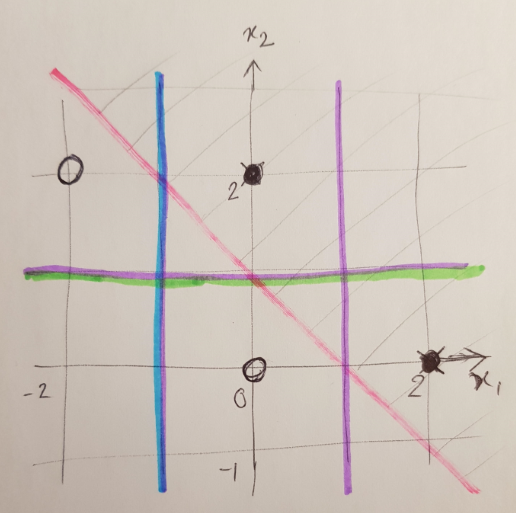

In the above plot, the blue line represents g1(x), purple represents g2(x), green represents g3(x), and the pink line represents the combined decision boundary ( ensemble decision boundary is represented by x2 + x1 > 1)

The shaded part (to the right of the pink line) is the side on which the ensemble predicts +1.